In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Colab Notebooks/2021-2 인공지능

/content/drive/MyDrive/Colab Notebooks/2021-2 인공지능


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

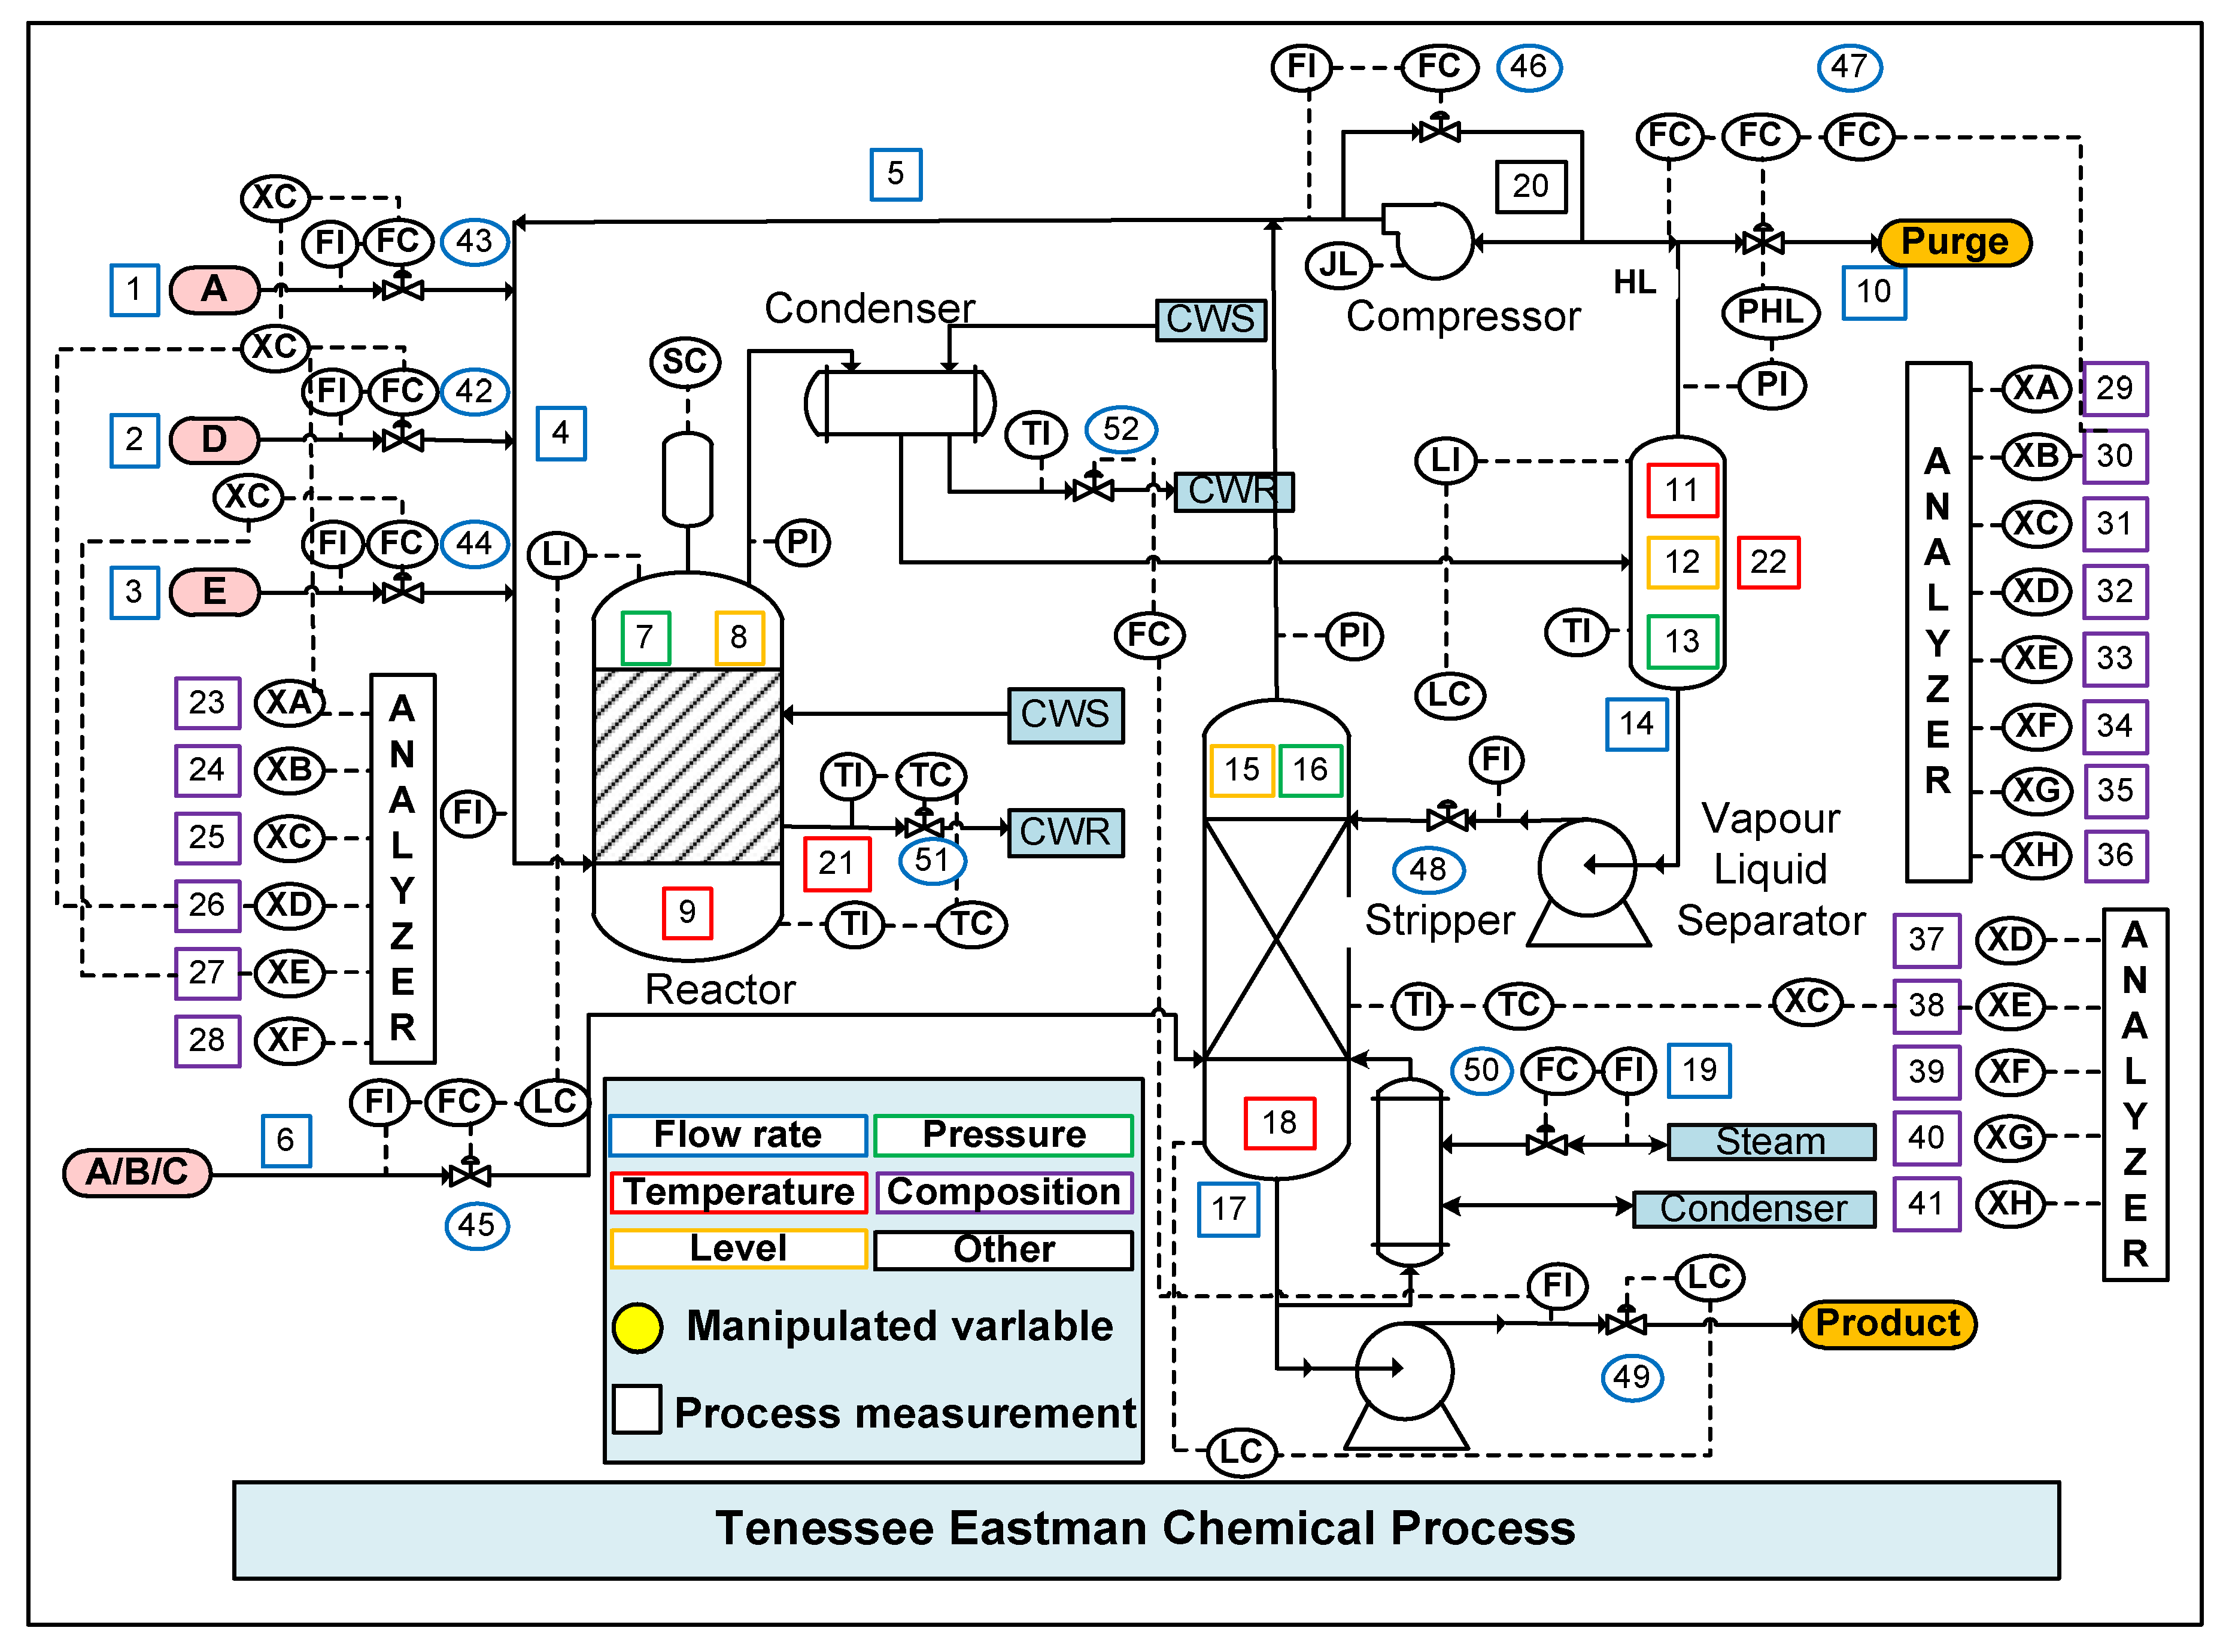

In [ ]:
from IPython.display import Image
Image('TEP.png')

In [4]:
data = pd.read_csv('TEP data.csv', index_col=0)
data.head()

,XMEAS 1,XMEAS 2,XMEAS 3,XMEAS 4,XMEAS 5,XMEAS 6,XMEAS 7,XMEAS 8,XMEAS 9,XMEAS 10,XMEAS 11,XMEAS 12,XMEAS 13,XMEAS 14,XMEAS 15,XMEAS 16,XMEAS 17,XMEAS 18,XMEAS 19,XMEAS 20,XMEAS 21,XMEAS 22,XMEAS 23,XMEAS 24,XMEAS 25,XMEAS 26,XMEAS 27,XMEAS 28,XMEAS 29,XMEAS 30,XMEAS 31,XMEAS 32,XMEAS 33,XMEAS 34,XMEAS 35,XMEAS 36,XMEAS 37,XMEAS 38,XMEAS 39,XMEAS 40,XMEAS 41,XMV 1,XMV 2,XMV 3,XMV 4,XMV 5,XMV 6,XMV 7,XMV 8,XMV 9,XMV 10,XMV 11,Fault
0,0.24889,3702.300049,4502.700195,9.4170,26.996000,42.182999,2705.199951,75.172997,120.400001,0.33611,80.068001,50.462002,2633.399902,25.184000,50.201000,3102.800049,22.617001,65.723999,228.649994,341.000000,94.592003,77.274002,32.188000,8.8933,26.382999,6.8820,18.775999,1.6567,32.958000,13.823,23.978001,1.2565,18.579,2.2633,4.8436,2.2986,0.017866,0.8357,0.098577,53.723999,43.827999,62.394001,54.058998,24.804001,63.269001,21.950001,40.188000,39.460999,47.000000,47.594002,41.383999,18.905001,0
1,0.24904,3666.199951,4526.000000,9.2682,26.709999,42.332001,2705.500000,74.411003,120.410004,0.33676,80.095001,51.905998,2634.399902,26.589001,49.824001,3102.199951,22.583000,65.725998,229.630005,341.440002,94.685997,77.383003,32.188000,8.8933,26.382999,6.8820,18.775999,1.6567,32.958000,13.823,23.978001,1.2565,18.579,2.2633,4.8436,2.2986,0.017866,0.8357,0.098577,53.723999,43.827999,63.014999,53.780998,24.790001,62.171001,22.239000,40.108002,43.709999,46.127998,47.507999,41.658001,18.976000,0
2,0.25034,3673.300049,4501.299805,9.4212,26.841999,42.360001,2705.300049,75.125000,120.410004,0.33739,80.198998,50.469002,2634.600098,24.493999,48.957001,3104.000000,23.591000,65.757004,228.440002,341.109985,94.568001,77.545998,32.222000,8.9441,26.076000,6.7883,18.672001,1.6665,33.011002,13.751,23.756001,1.1904,18.961,2.2628,4.8707,2.2701,0.017866,0.8357,0.098577,53.723999,43.827999,62.893002,54.075001,24.669001,61.584999,22.191000,40.029999,39.480000,44.120998,47.612000,41.721001,16.562000,0
3,0.25109,3657.800049,4497.799805,9.3792,26.528000,41.981998,2707.300049,73.991997,120.379997,0.33664,80.329002,48.215000,2635.899902,27.367001,49.708000,3104.699951,22.097000,65.787003,230.119995,341.339996,94.623001,77.569000,32.222000,8.9441,26.076000,6.7883,18.672001,1.6665,33.011002,13.751,23.756001,1.1904,18.961,2.2628,4.8707,2.2701,0.017866,0.8357,0.098577,53.723999,43.827999,63.160000,54.117001,24.594999,61.561001,21.959000,40.120998,32.848000,45.858002,47.459000,40.835999,20.094000,0
4,0.24563,3698.000000,4537.399902,9.3746,26.736000,42.354000,2705.300049,75.282997,120.419998,0.32521,80.129997,49.518002,2634.100098,22.341000,49.661999,3103.500000,22.854000,65.790001,230.089996,341.239990,94.399002,77.157997,32.198002,8.9947,26.188000,6.9876,18.652000,1.6479,33.387001,13.796,23.854000,1.1715,18.900,2.2754,4.8080,2.2547,0.017866,0.8357,0.098577,53.723999,43.827999,63.334000,53.905998,24.451000,61.388000,22.271000,39.537998,36.681999,45.752998,47.458000,41.727001,18.330000,0


In [5]:
data.describe()

,XMEAS 1,XMEAS 2,XMEAS 3,XMEAS 4,XMEAS 5,XMEAS 6,XMEAS 7,XMEAS 8,XMEAS 9,XMEAS 10,XMEAS 11,XMEAS 12,XMEAS 13,XMEAS 14,XMEAS 15,XMEAS 16,XMEAS 17,XMEAS 18,XMEAS 19,XMEAS 20,XMEAS 21,XMEAS 22,XMEAS 23,XMEAS 24,XMEAS 25,XMEAS 26,XMEAS 27,XMEAS 28,XMEAS 29,XMEAS 30,XMEAS 31,XMEAS 32,XMEAS 33,XMEAS 34,XMEAS 35,XMEAS 36,XMEAS 37,XMEAS 38,XMEAS 39,XMEAS 40,XMEAS 41,XMV 1,XMV 2,XMV 3,XMV 4,XMV 5,XMV 6,XMV 7,XMV 8,XMV 9,XMV 10,XMV 11,Fault
count,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000,24980.000000
mean,0.256532,3663.879388,4508.703822,9.402836,26.902459,42.384153,2726.636849,74.766053,120.401563,0.344920,79.672202,49.974227,2654.779541,25.097449,49.947387,3124.252377,22.899224,66.020652,248.055320,341.000447,94.400332,77.100735,32.024448,8.854892,26.854875,6.863946,18.630727,1.622499,32.710608,13.772349,24.684431,1.245980,18.355179,2.214336,4.764021,2.259621,0.017769,0.833794,0.097101,53.700602,43.823953,64.445078,54.858435,29.684086,64.351380,21.788686,39.086630,38.024163,46.412239,49.430993,42.737051,20.865093,10.357086
std,0.145361,43.766306,111.694789,0.403952,0.228499,0.338538,82.449995,1.363031,0.072065,0.083460,1.867076,0.995480,83.544595,1.059524,1.006803,83.354803,0.639988,1.744552,70.903902,12.015744,1.317784,1.189541,1.856877,0.236831,1.973783,0.144321,1.100921,0.135068,2.807251,0.301173,3.022147,0.159388,1.547002,0.184183,0.364075,0.189627,0.010062,0.098962,0.013898,0.599167,0.621837,6.168185,8.019043,20.085815,9.765573,6.564505,13.808984,2.929580,2.330026,17.777168,13.289908,11.737899,6.417475
min,-0.002739,3430.899902,3851.899902,7.560200,25.584999,40.723000,2488.300049,65.443001,119.690002,0.118740,72.736000,46.400002,2399.500000,20.787001,44.862000,2923.399902,20.263000,56.365002,26.107000,273.420013,80.459999,64.843002,23.823000,7.547700,20.399000,6.144200,12.823000,0.928620,20.549999,12.259000,15.021000,0.395870,10.489000,1.303900,3.352000,1.431600,-0.016855,0.444140,0.032736,51.161999,41.446999,59.758999,27.566999,0.000000,47.789001,-0.045435,0.000000,27.504000,34.644001,-0.581240,-0.138150,12.187000,0.000000
25%,0.217508,3635.399902,4472.899902,9.272400,26.767000,42.192001,2697.600098,74.356003,120.379997,0.322257,79.793749,49.252748,2625.275025,24.378000,49.264000,3096.100098,22.417000,65.388000,222.289993,339.339996,94.429001,76.989998,31.909000,8.786700,26.153999,6.790300,18.514999,1.627100,32.605999,13.703000,23.697001,1.177500,18.261999,2.231500,4.767200,2.242400,0.011149,0.816710,0.090027,53.316002,43.432999,62.653000,53.542999,22.146999,60.415001,21.422001,38.241001,35.900751,44.830002,44.955751,40.625000,17.199750,5.000000
50%,0.250250,3663.300049,4510.799805,9.355400,26.897500,42.351002,2705.600098,74.924004,120.400001,0.335620,80.084000,50.004002,2634.000000,25.122000,49.883999,3102.800049,22.902000,65.890999,234.529999,341.290008,94.583000,77.264000,32.178001,8.881100,26.441000,6.874350,18.777500,1.654100,32.936001,13.809000,24.059000,1.256000,18.577999,2.261200,4.838500,2.295450,0.017792,0.835980,0.097967,53.712002,43.818001,63.108002,53.995499,25.155500,61.428501,22.112000,39.888000,38.110500,46.266998,48.266998,41.220001,18.334999,10.000000
75%,0.281593,3690.699951,4550.500000,9.454400,27.041000,42.528000,2714.699951,75.421997,120.419998,0.347670,80.346001,50.625000,2643.399902,25.797001,50.627998,3110.600098,23.334999,66.516998,250.362499,342.890015,94.732002,77.523003,32.45200

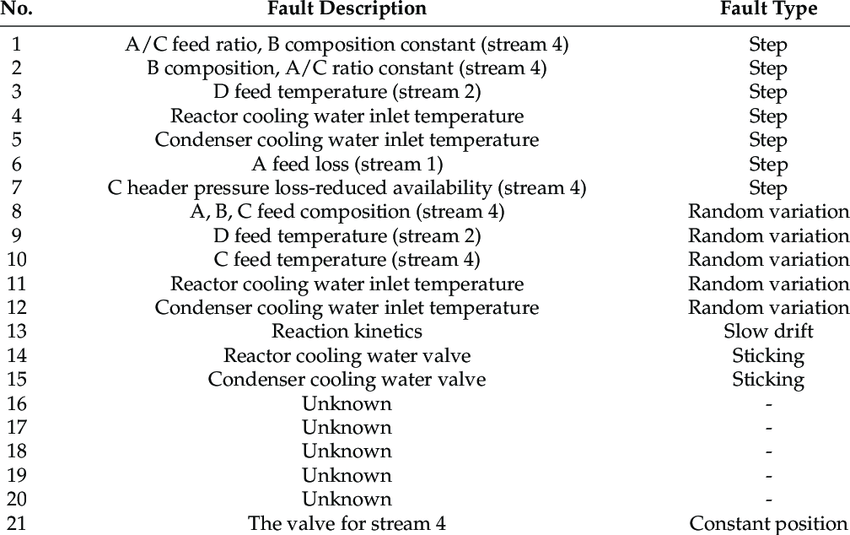

In [13]:
from IPython.display import Image
Image('TEP faults.png')

In [6]:
input_dim = len(data.columns)-1
output_dim = len(data['Fault'].unique())
data.groupby(data['Fault']).count()

,XMEAS 1,XMEAS 2,XMEAS 3,XMEAS 4,XMEAS 5,XMEAS 6,XMEAS 7,XMEAS 8,XMEAS 9,XMEAS 10,XMEAS 11,XMEAS 12,XMEAS 13,XMEAS 14,XMEAS 15,XMEAS 16,XMEAS 17,XMEAS 18,XMEAS 19,XMEAS 20,XMEAS 21,XMEAS 22,XMEAS 23,XMEAS 24,XMEAS 25,XMEAS 26,XMEAS 27,XMEAS 28,XMEAS 29,XMEAS 30,XMEAS 31,XMEAS 32,XMEAS 33,XMEAS 34,XMEAS 35,XMEAS 36,XMEAS 37,XMEAS 38,XMEAS 39,XMEAS 40,XMEAS 41,XMV 1,XMV 2,XMV 3,XMV 4,XMV 5,XMV 6,XMV 7,XMV 8,XMV 9,XMV 10,XMV 11
Fault,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
1,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120
2,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120
3,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120
4,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120
5,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120
6,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120
7,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120
8,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120


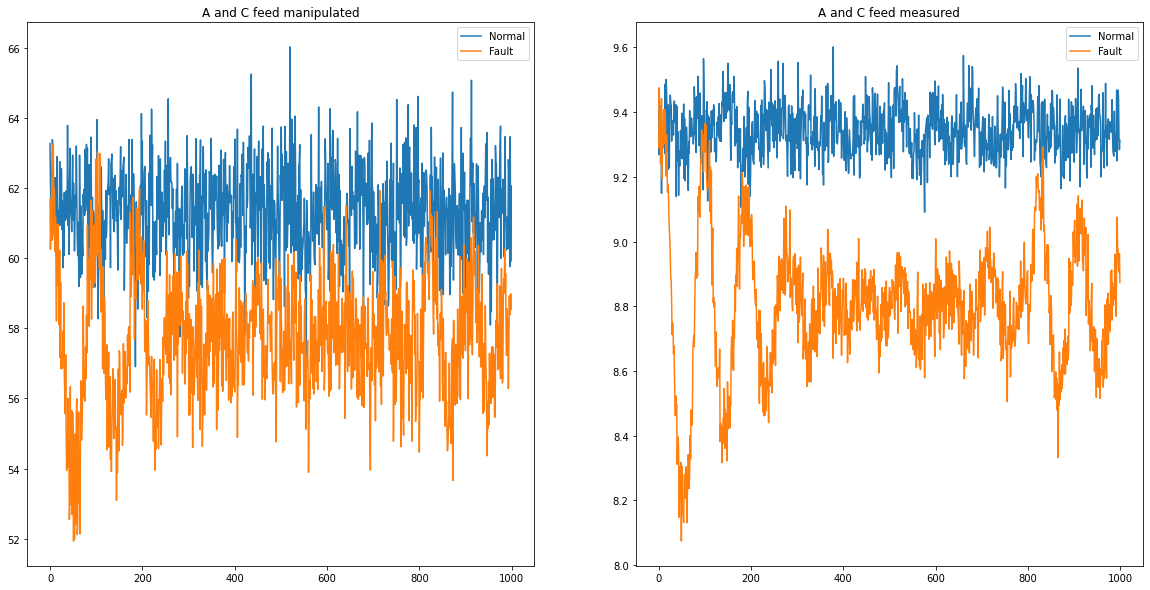

In [64]:
import numpy as np
data_normal = data[data['Fault']==0]
data_fault1 = data[data['Fault']==1]
len = 1000
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(np.arange(len), data_normal['XMV 4'][:len], label='Normal')
plt.plot(np.arange(len), data_fault1['XMV 4'][:len], label='Fault')
plt.title('A and C feed manipulated')
plt.legend()
plt.subplot(1,2,2)
plt.plot(np.arange(len), data_normal['XMEAS 4'][:len], label='Normal')
plt.plot(np.arange(len), data_fault1['XMEAS 4'][:len], label='Fault')
plt.title('A and C feed measured')
plt.legend()

In [7]:
from sklearn.model_selection import train_test_split
X = data.drop(['Fault'], axis=1).values
y = data['Fault'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(19984, 52) (19984,)
(4996, 52) (4996,)


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y_train_enc = enc.fit_transform(y_train.reshape((-1,1))).toarray()
y_test_enc = enc.transform(y_test.reshape((-1,1))).toarray()
y_train_enc

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [32]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization
model=Sequential()
model.add(Dense(64, kernel_initializer='he_uniform', input_shape=(input_dim,)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(32, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(32, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(32, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(output_dim, activation='softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 64)                3392      
                                                                 
 batch_normalization_4 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_46 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_5 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32)              

In [33]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import SGD, Adam
opt = Adam(learning_rate=0.001, decay=0.001)
model.compile(loss='categorical_crossentropy', metrics='accuracy', optimizer=opt)
earlystopping = EarlyStopping(monitor='val_loss', patience=20)
checkpointer = ModelCheckpoint(filepath="best model.h5", verbose=0, save_best_only=True)
history = model.fit(X_train_scaled, y_train_enc, validation_split=0.2, epochs=1000, batch_size=128,
                    callbacks=[earlystopping, checkpointer])

Epoch 1/1000
125/125 [==============================] - 3s 10ms/step - loss: 2.5495 - accuracy: 0.2363 - val_loss: 2.8512 - val_accuracy: 0.1914
Epoch 2/1000
125/125 [==============================] - 1s 5ms/step - loss: 2.1044 - accuracy: 0.3476 - val_loss: 2.5504 - val_accuracy: 0.2407
Epoch 3/1000
125/125 [==============================] - 1s 5ms/step - loss: 1.8815 - accuracy: 0.4027 - val_loss: 2.4419 - val_accuracy: 0.2812
Epoch 4/1000
125/125 [==============================] - 1s 4ms/step - loss: 1.7203 - accuracy: 0.4487 - val_loss: 2.7024 - val_accuracy: 0.3195
Epoch 5/1000
125/125 [==============================] - 1s 4ms/step - loss: 1.6112 - accuracy: 0.4872 - val_loss: 2.0247 - val_accuracy: 0.3905
Epoch 6/1000
125/125 [==============================] - 1s 5ms/step - loss: 1.5135 - accuracy: 0.5165 - val_loss: 1.8277 - val_accuracy: 0.4356
Epoch 7/1000
125/125 [==============================] - 1s 5ms/step - loss: 1.4217 - accuracy: 0.5435 - val_loss: 1.6588 - val_accuracy

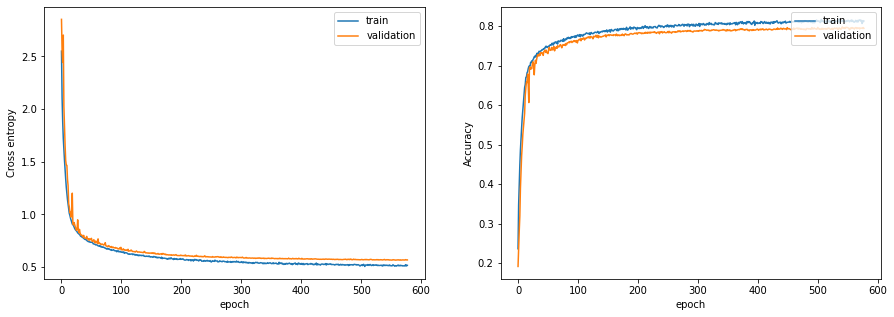

In [34]:
history = history.history
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.ylabel('Cross entropy', fontsize=10)
plt.xlabel('epoch', fontsize=10)
plt.legend(['train', 'validation'], loc='upper right', fontsize=10)
plt.subplot(1,2,2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.ylabel('Accuracy', fontsize=10)
plt.xlabel('epoch', fontsize=10)
plt.legend(['train', 'validation'], loc='upper right', fontsize=10)

In [35]:
from sklearn.metrics import accuracy_score
y_pred_enc = model.predict(X_test_scaled)
y_pred = enc.inverse_transform(y_pred_enc)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy : ', accuracy)

Accuracy :  0.8028422738190553


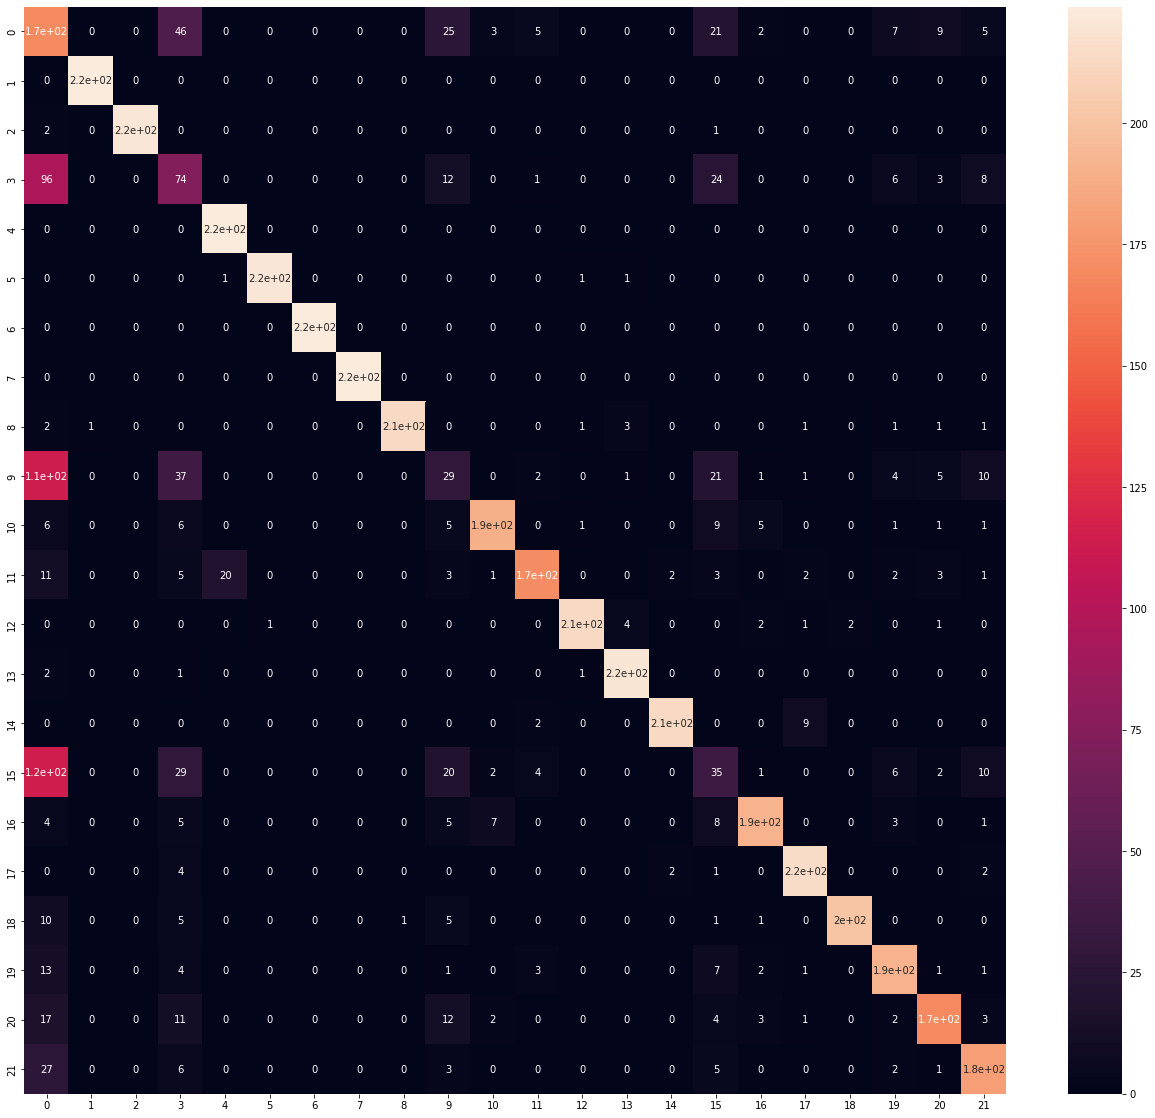

In [36]:
from keras.models import load_model
from sklearn.metrics import confusion_matrix
# model = load_model('best model.h5')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(22,20))
sns.heatmap(cm, annot=True)